In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from network import Network

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

## Pacemakers-driven network

In [4]:
N = 50
P = 20
GC = 100
DENSITY = .3
TMAX = 1000
T_REF = .1

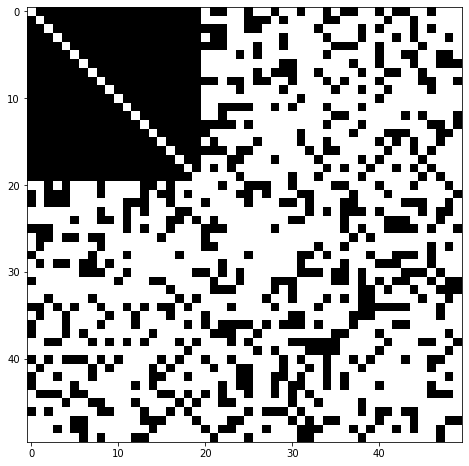

In [5]:
# define edges
edges = []
for i in range(P):
    for j in range(i+1, P):
        edges.append((i ,j))
        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction')

# display connection matrix
ntwk.disp_conn_mat()

In [167]:
# run the simulation
ntwk.run()

100%|██████████| 99999/99999 [01:06<00:00, 1497.55it/s]


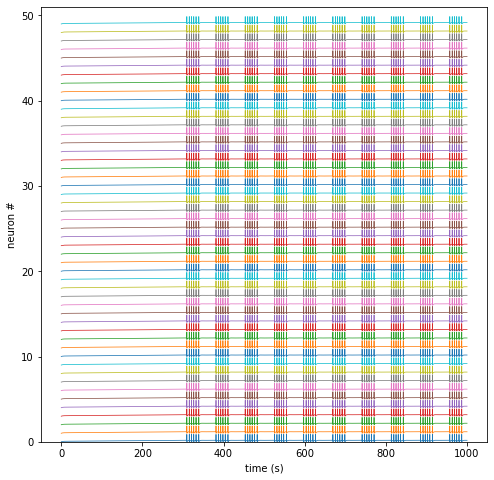

In [168]:
ntwk.disp(figsize=(8, 8), style='trace')

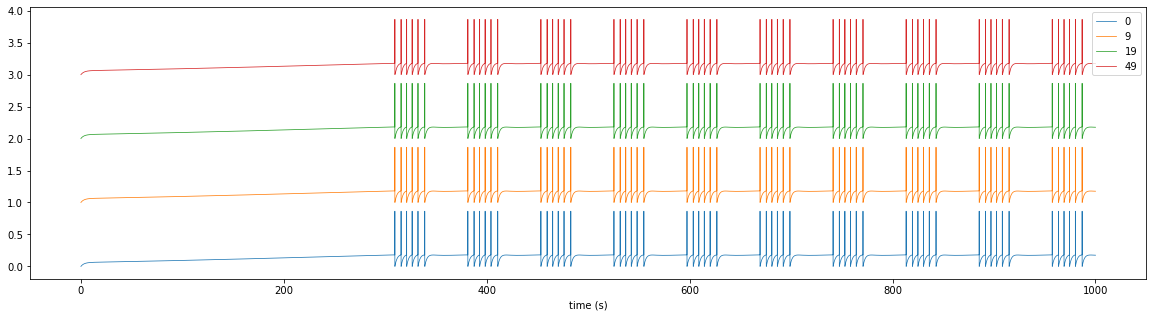

In [169]:
plt.figure(figsize=(20,5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(time_axis, adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(time_axis, adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(time_axis, adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.xlabel('time (s)')
plt.show()

In [49]:
# Test external stimulation
ntwk = Network(num=N, edges=edges, gc=GC, tmax=100, pacemakers=range(P), conn_type='gap_junction')
ntwk.i_stim = 1e6
ntwk.t_stim = .1
ntwk.run(stim={40: [25] })

100%|██████████| 9999/9999 [00:06<00:00, 1472.80it/s]


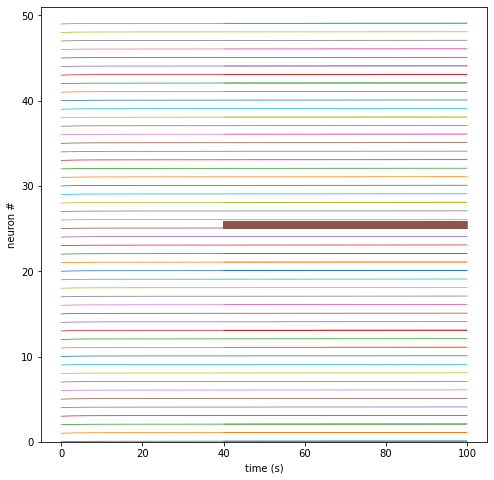

In [50]:
ntwk.disp(figsize=(8, 8), style='trace')

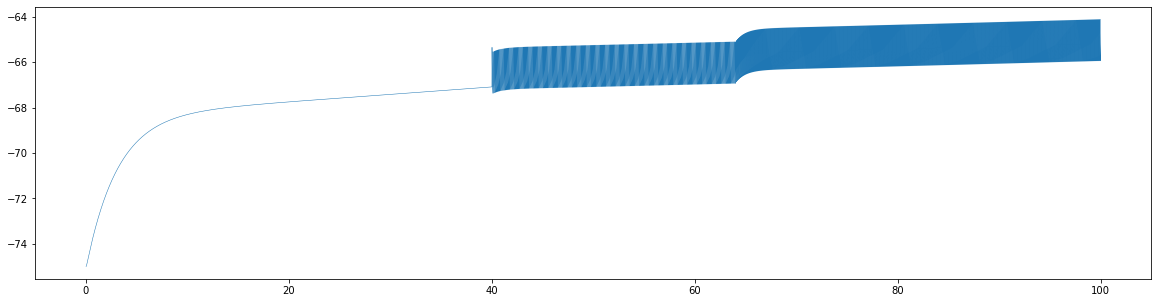

In [58]:
plt.figure(figsize=(20, 5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, ntwk.neurons[20].v_train, lw=.5)
plt.show()

## Distributed network

In [14]:
N = 50
GC = 100
DENSITY = .3
TMAX = 1000
T_REF = .1
WNOISE = 5000

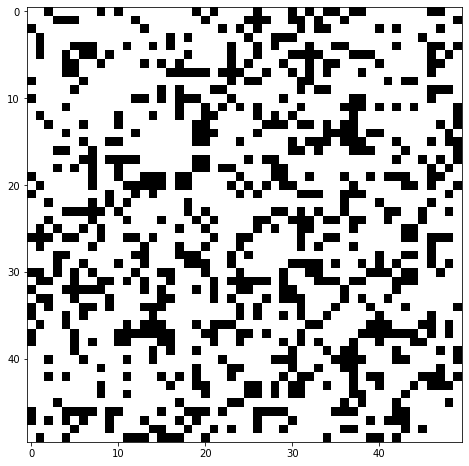

In [15]:
# define edges
edges = []        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(N), conn_type='gap_junction', wnoise=WNOISE)

# display connection matrix
ntwk.disp_conn_mat()

In [68]:
# run the simulation
ntwk.run()

100%|██████████| 99999/99999 [00:56<00:00, 1760.58it/s]


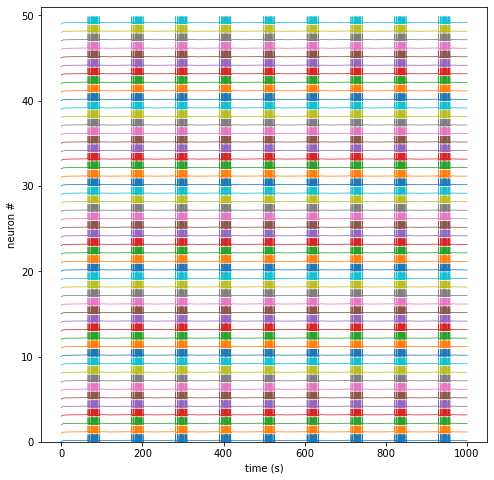

In [69]:
ntwk.disp(figsize=(8, 8), style='trace')

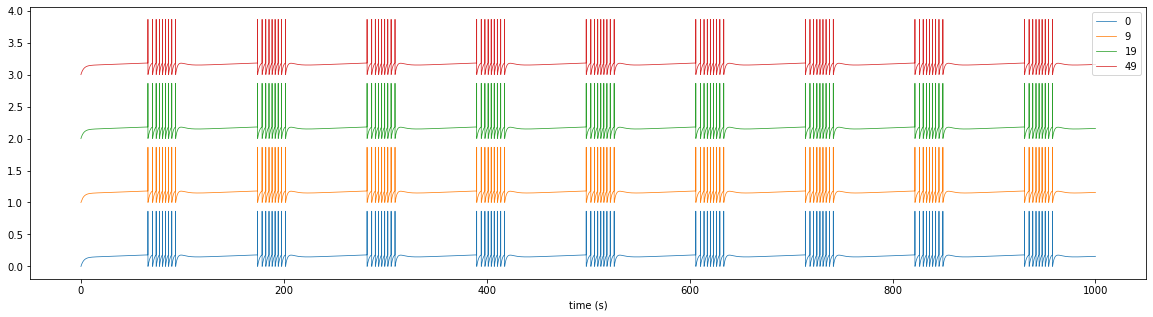

In [70]:
plt.figure(figsize=(20,5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(time_axis, adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(time_axis, adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(time_axis, adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.xlabel('time (s)')
plt.show()

In [29]:
# Test external stimulation
ntwk = Network(num=N, edges=edges, gc=GC, tmax=1000, pacemakers=range(N), conn_type='gap_junction', wnoise=WNOISE)
ntwk.i_stim = 2200
ntwk.t_stim = .1
ntwk.run(stim={20: [25] })

100%|██████████| 99999/99999 [00:58<00:00, 1718.24it/s]


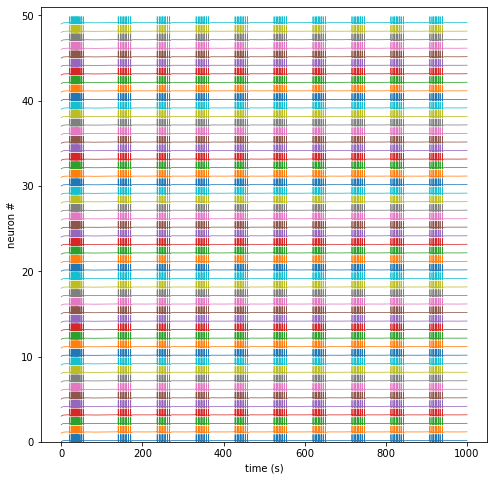

In [30]:
ntwk.disp(figsize=(8, 8), style='trace')

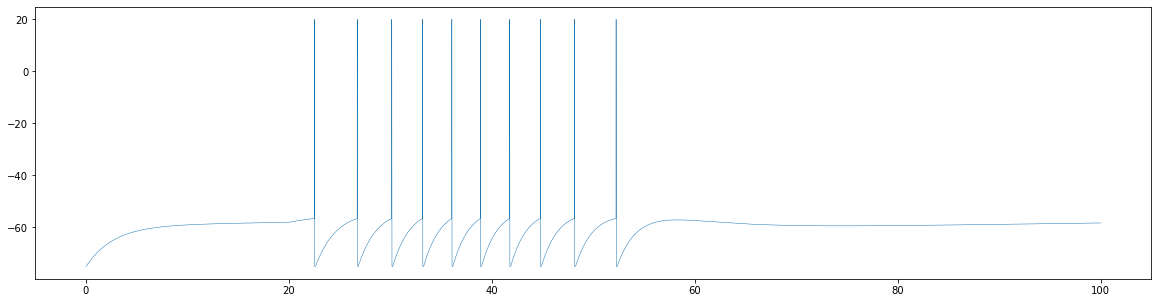

In [24]:
plt.figure(figsize=(20, 5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, ntwk.neurons[23].v_train, lw=.5)
plt.show()

## Semi-pacemakers driven network

In [40]:
N = 50
P = 5
GC = 100
DENSITY = .3
TMAX = 1000
T_REF = .1

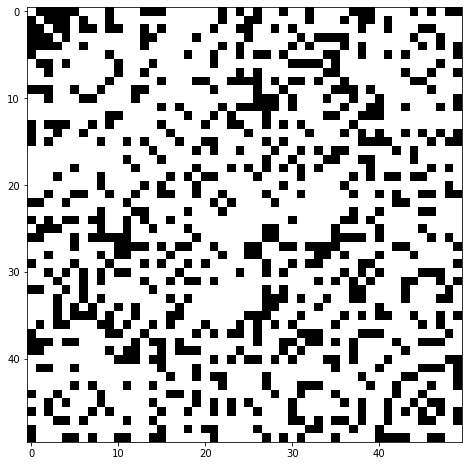

In [41]:
# define edges
edges = []
for i in range(P):
    for j in range(i+1, P):
        edges.append((i ,j))
        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction', is_semi_pm=True)

# display connection matrix
ntwk.disp_conn_mat()

In [42]:
# run the simulation
ntwk.run()

100%|██████████| 99999/99999 [00:57<00:00, 1749.42it/s]


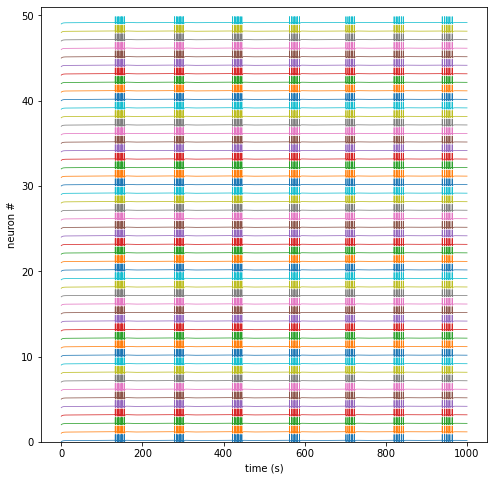

In [43]:
ntwk.disp(figsize=(8, 8), style='trace')

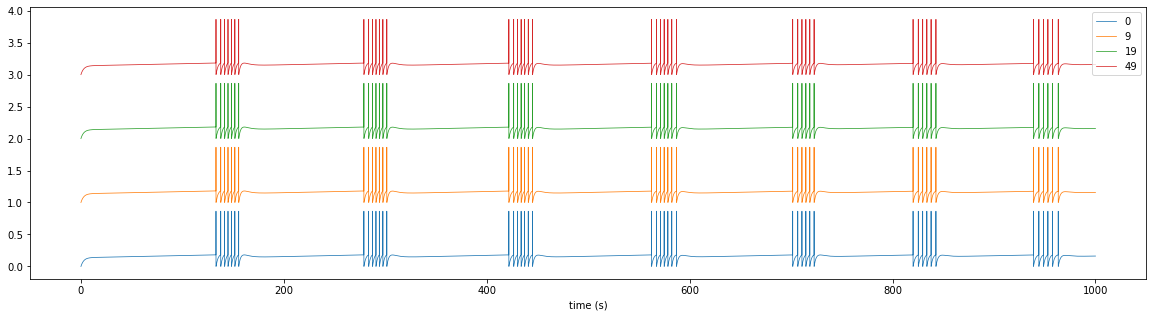

In [44]:
plt.figure(figsize=(20,5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(time_axis, adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(time_axis, adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(time_axis, adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.xlabel('time (s)')
plt.show()